# Sympy inverted pendulum tutorial

Deriving the state space equations for the inverted pendulum using sympy.

Sympy is a well-supported package, widely used for physics and mechanics. The derivation that I'll show here can be done much more efficiently using the built in Lagrange or Kane's module, but the method I use below is hopefully a bit more intuitive for new sympy users.

Examples of the native sympy method for dynamical systems: 
- https://docs.sympy.org/latest/modules/physics/mechanics/examples/lin_pend_nonmin_example.html
- https://www.moorepants.info/blog/npendulum.html 3

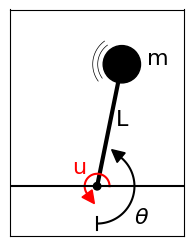

In [1]:
from sympy import *
from sympy.physics.mechanics import dynamicsymbols
import numpy as np
import matplotlib.pyplot as plt

import functions.plot_functions as pf

fig, ax0 = plt.subplots(1,1,figsize =(3,3), dpi = 100) 
pf.draw_pendulum(ax0)

In [2]:
t, m, L, g, b = symbols('t, m L g b')
theta, u = dynamicsymbols('theta, u') 

difftheta = diff(theta,t)
d2theta = diff(difftheta,t)

y = Matrix([theta, difftheta])
y

Matrix([
[               theta(t)],
[Derivative(theta(t), t)]])

In [3]:
kinetic_energy = m/2*L**2*difftheta**2
potential_energy = cos(theta)*m*g*L 

lagrange = kinetic_energy - potential_energy 
lagrange

L**2*m*Derivative(theta(t), t)**2/2 - L*g*m*cos(theta(t))

# Lagrange's equation
We'll use the term Q to include the forcing and damping term ($Q=u-b\dot{\theta}$). 

$ \frac{d}{dt}\left( \frac{\partial \mathcal{L}}{ \partial \dot{\theta}}\right) - \frac{\partial \mathcal{L}}{ \partial \theta} = Q$

In [10]:
Q = u-b*difftheta  

EOM = diff(diff( lagrange, difftheta),t) - diff(lagrange, theta) - Q
EOM

L**2*m*Derivative(theta(t), (t, 2)) - L*g*m*sin(theta(t)) + b*Derivative(theta(t), t) - u(t)

# Obtaining second order diff eq.
We can group parts of the equation as a mass term (M) and all the lower order terms on the  right-hand side (RHS):

$M\frac{d^2 \theta(t)}{dt^2} = RHS(\theta, u)$

$\frac{d^2 \theta(t)}{dt^2} = M^{-1} RHS(\theta, u)$


$\frac{d^2 \theta(t)}{dt^2} = f(\theta, u)$

In [5]:
M  = diff(EOM,d2theta) 
RHS = EOM - M*d2theta   

f = 1/M * RHS
f

(-L*g*m*sin(theta(t)) + b*Derivative(theta(t), t) - u(t))/(L**2*m)

# Converting equation to state space
We now create a vector of variables that make up the state: $y=[\theta,  \dot{\theta}]$

Let's define F to be a function of the state and forcing u: 

$\dot{y} = F(y, u)$

In [11]:
y = Matrix([theta, difftheta])
F = Matrix([difftheta, f])
F

Matrix([
[                                           Derivative(theta(t), t)],
[(-L*g*m*sin(theta(t)) + b*Derivative(theta(t), t) - u(t))/(L**2*m)]])

# Converting symbolic to numeric functions
This is a two-step process:
1. We substitute values for numeric parameters (L=1, m=1, g=10, b=0.1)
2. We convert the symbolic equation to numeric using *Lambdify*

We also define what the input array looks like:

$F_{input} = [\theta, \dot{\theta}, u]$

In [14]:
parameter_dictionary = {L:1, m:1, g:10, b:0.1}

F_sub = F.subs(parameter_dictionary)

F_input = Matrix([theta, difftheta, u])

F_numeric = lambdify(F_input, F_sub)

# We can now test some known values:

$ f([\pi,0, 0]) = [ 0 , 0] $

$ f([\pi/2,0, 0]) = [ 0,-10 ] $

$f([0,1, 0]) = [1,-0.1]$  ------ (the -0.1 is due to a 0.1 damping term)

In [13]:
print( F_numeric(np.pi,0,0) )
print('------------')
print( F_numeric(np.pi/2,0,0))
print('------------')
print(F_numeric(0,1,0))

[[ 0.0000000e+00]
 [-1.2246468e-15]]
------------
[[  0.]
 [-10.]]
------------
[[1. ]
 [0.1]]
